In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('covid-data.csv')

In [21]:
df.head(10)

Date      State         Country  Confirmed  Deaths  Recovered
0 2020-01-22      Anhui  Mainland China        1.0     0.0        0.0
1 2020-01-22    Beijing  Mainland China       14.0     0.0        0.0
2 2020-01-22  Chongqing  Mainland China        6.0     0.0        0.0
3 2020-01-22     Fujian  Mainland China        1.0     0.0        0.0
4 2020-01-22      Gansu  Mainland China        0.0     0.0        0.0
5 2020-01-22  Guangdong  Mainland China       26.0     0.0        0.0
6 2020-01-22    Guangxi  Mainland China        2.0     0.0        0.0
7 2020-01-22    Guizhou  Mainland China        1.0     0.0        0.0
8 2020-01-22     Hainan  Mainland China        4.0     0.0        0.0
9 2020-01-22      Hebei  Mainland China        1.0     0.0        0.0

In [5]:
df.drop(['SNo','Last Update'], axis = 1, inplace = True)
df.rename(columns={'ObservationDate':'Date', 'Province/State':'State', 'Country/Region':'Country'}, inplace = True)

In [6]:
df.head()

Date      State         Country  Confirmed  Deaths  Recovered
0  01/22/2020      Anhui  Mainland China        1.0     0.0        0.0
1  01/22/2020    Beijing  Mainland China       14.0     0.0        0.0
2  01/22/2020  Chongqing  Mainland China        6.0     0.0        0.0
3  01/22/2020     Fujian  Mainland China        1.0     0.0        0.0
4  01/22/2020      Gansu  Mainland China        0.0     0.0        0.0

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.head()

Date      State         Country  Confirmed  Deaths  Recovered
0 2020-01-22      Anhui  Mainland China        1.0     0.0        0.0
1 2020-01-22    Beijing  Mainland China       14.0     0.0        0.0
2 2020-01-22  Chongqing  Mainland China        6.0     0.0        0.0
3 2020-01-22     Fujian  Mainland China        1.0     0.0        0.0
4 2020-01-22      Gansu  Mainland China        0.0     0.0        0.0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285307 entries, 0 to 285306
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       285307 non-null  datetime64[ns]
 1   State      212318 non-null  object        
 2   Country    285307 non-null  object        
 3   Confirmed  285307 non-null  float64       
 4   Deaths     285307 non-null  float64       
 5   Recovered  285307 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 13.1+ MB


In [10]:
df = df.fillna('NA')

In [17]:
df2 = df.groupby(['Country','Date'])[['Country', 'Confirmed','Deaths','Recovered']].sum().reset_index()

In [18]:
df2.head(20)

Country       Date  Confirmed  Deaths  Recovered
0        Azerbaijan 2020-02-28        1.0     0.0        0.0
1   ('St. Martin',) 2020-03-10        2.0     0.0        0.0
2       Afghanistan 2020-02-24        1.0     0.0        0.0
3       Afghanistan 2020-02-25        1.0     0.0        0.0
4       Afghanistan 2020-02-26        1.0     0.0        0.0
5       Afghanistan 2020-02-27        1.0     0.0        0.0
6       Afghanistan 2020-02-28        1.0     0.0        0.0
7       Afghanistan 2020-02-29        1.0     0.0        0.0
8       Afghanistan 2020-03-01        1.0     0.0        0.0
9       Afghanistan 2020-03-02        1.0     0.0        0.0
10      Afghanistan 2020-03-03        2.0     0.0        0.0
11      Afghanistan 2020-03-04        4.0     0.0        0.0
12      Afghanistan 2020-03-05        4.0     0.0        0.0
13      Afghanistan 2020-03-06        4.0     0.0        0.0
14      Afghanistan 2020-03-07        4.0     0.0        0.0
15      Afghanistan 2020-03-08        5.0     0.0        0.0
16      Afghanistan 2020-03-09        7.0     0.0        0.0
17      Afghanistan 2020-03-10        8.0     0.0        0.0
18      Afghanistan 2020-03-11       11.0     0.0        0.0
19      Afghanistan 2020-03-12       12.0     0.0        0.0

In [15]:
countries = df2['Country'].unique()
len(countries)

228

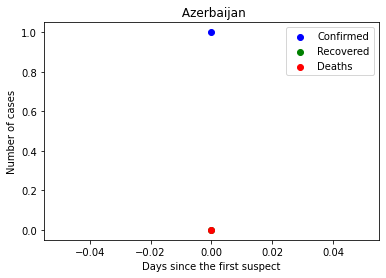

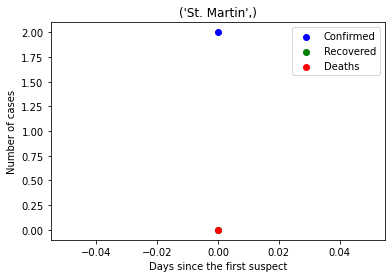

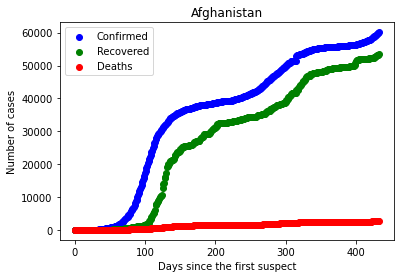

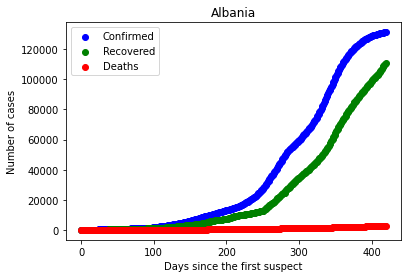

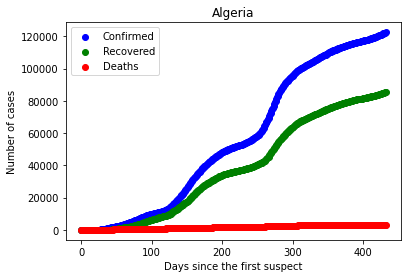

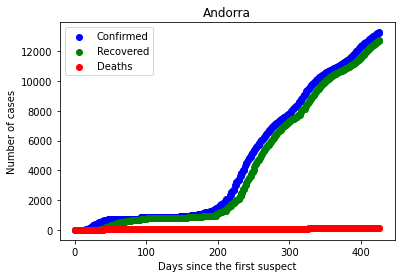

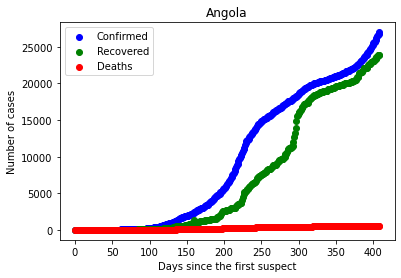

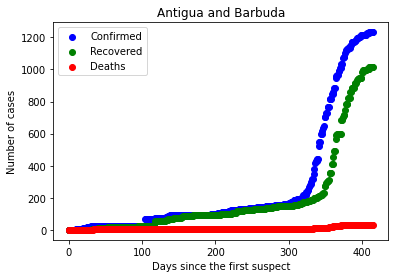

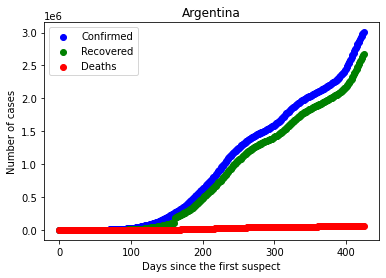

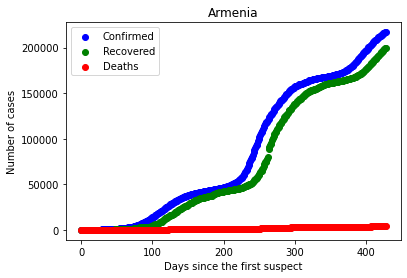

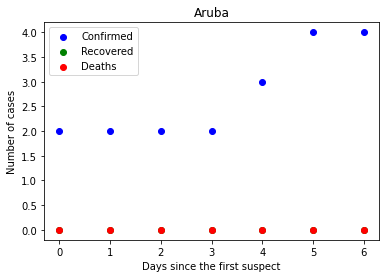

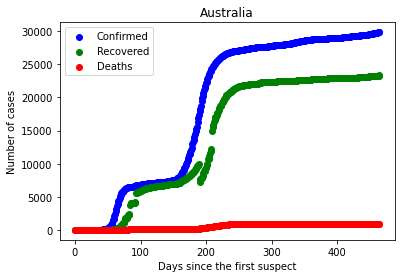

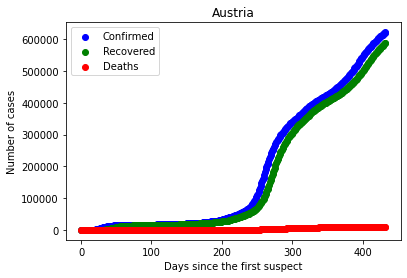

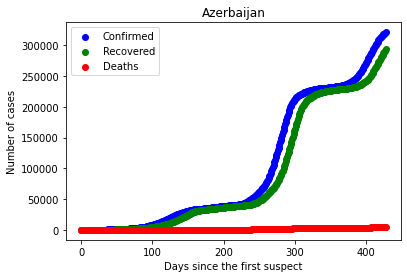

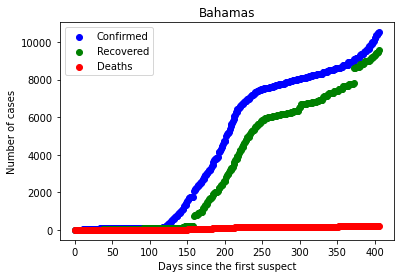

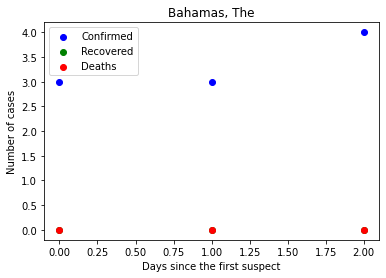

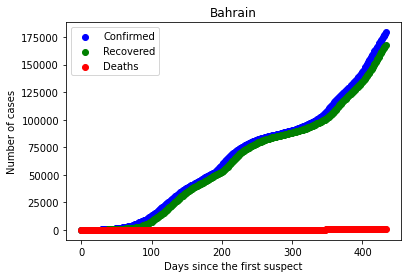

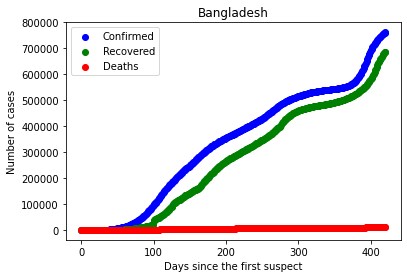

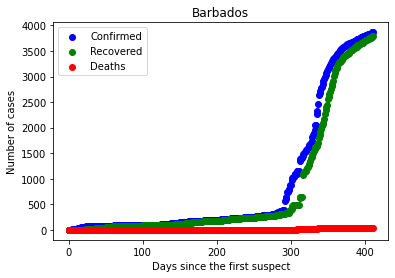

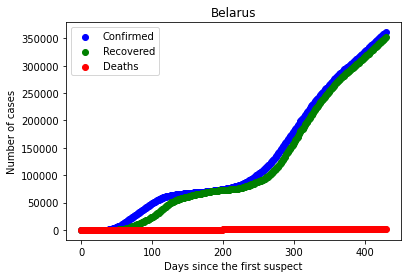

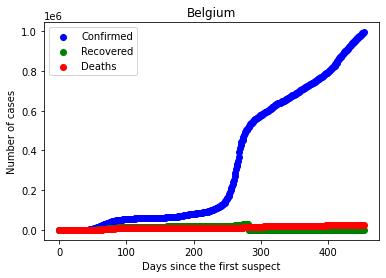

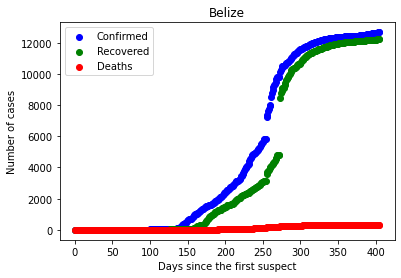

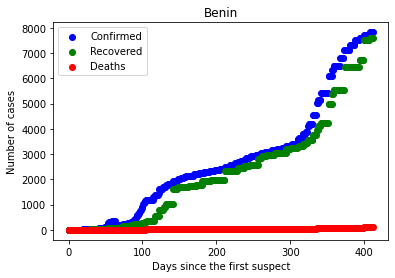

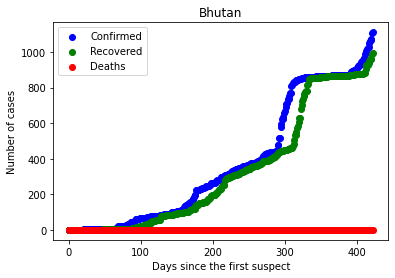

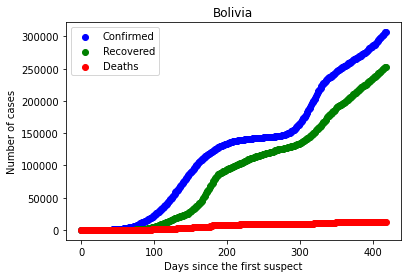

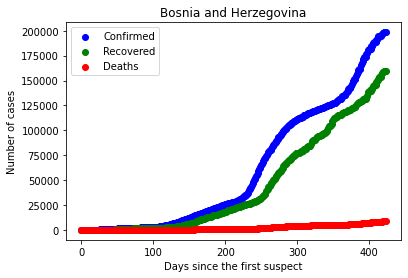

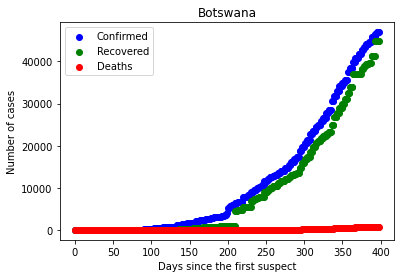

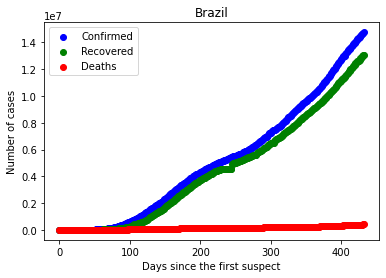

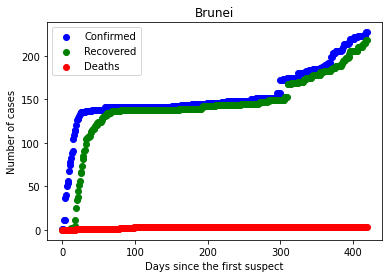

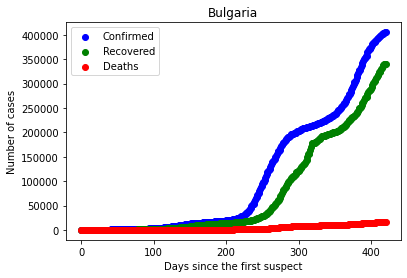

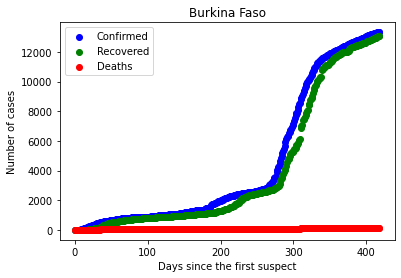

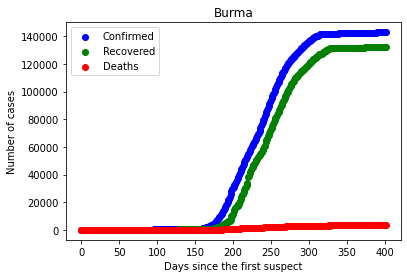

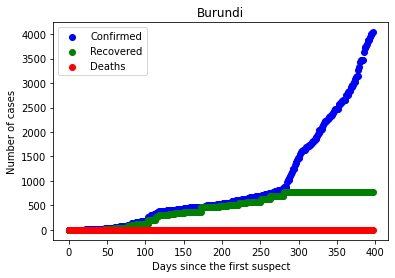

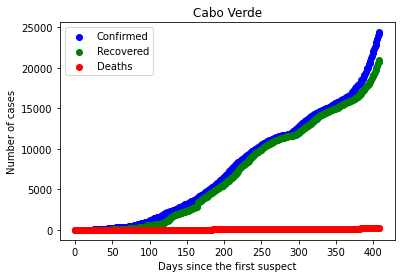

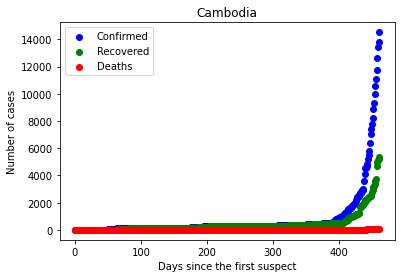

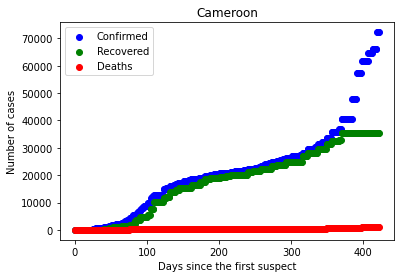

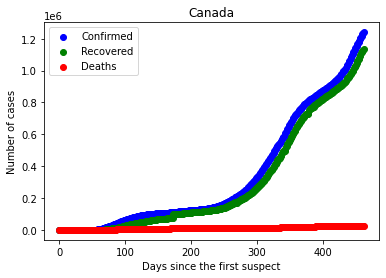

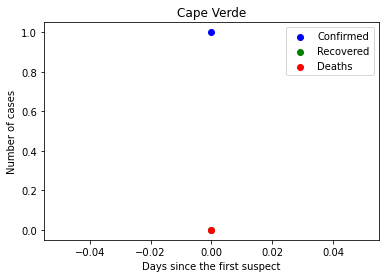

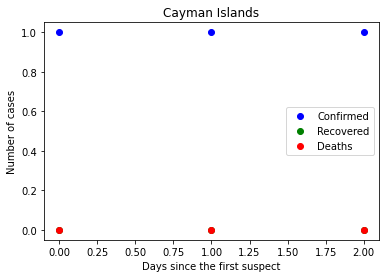

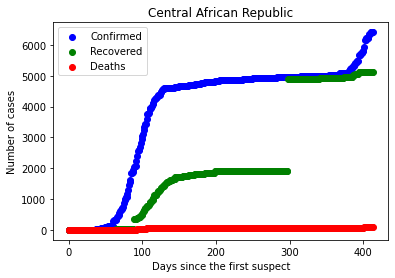

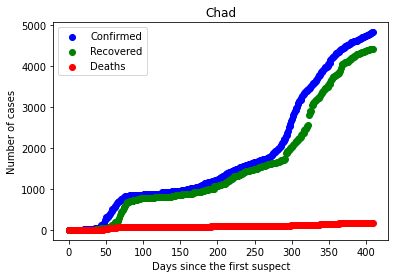

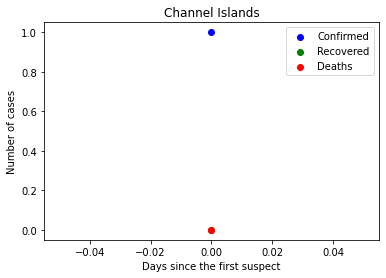

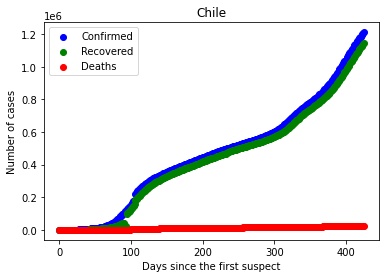

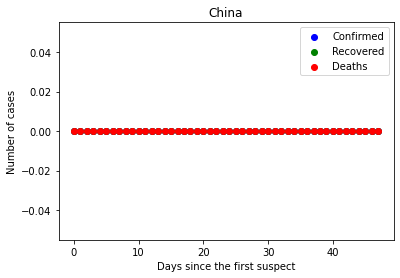

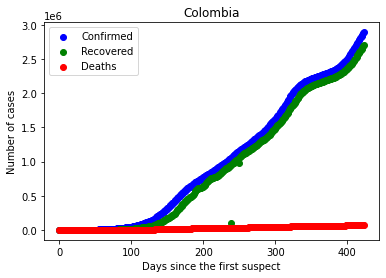

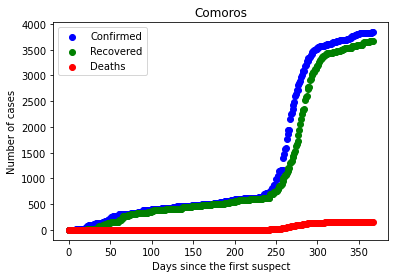

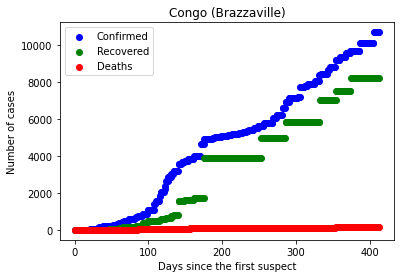

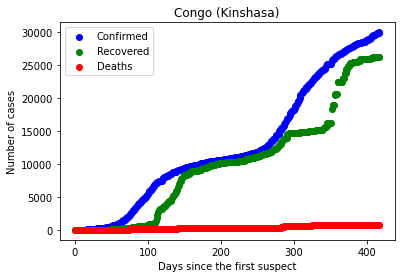

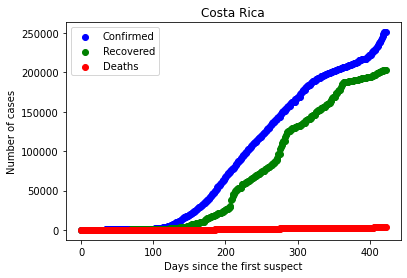

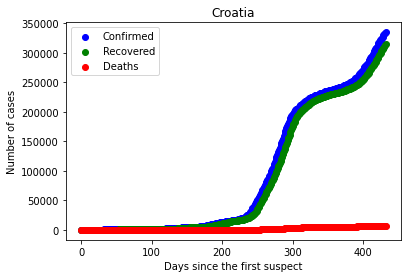

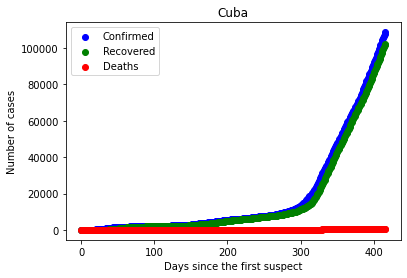

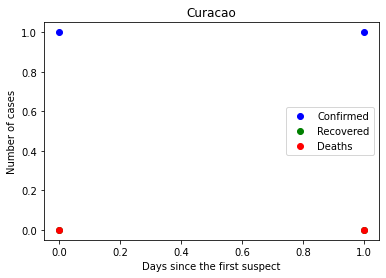

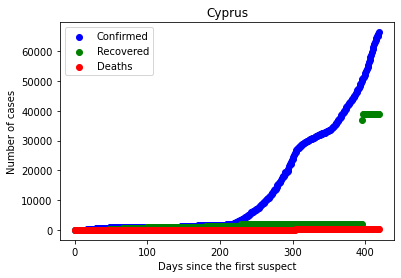

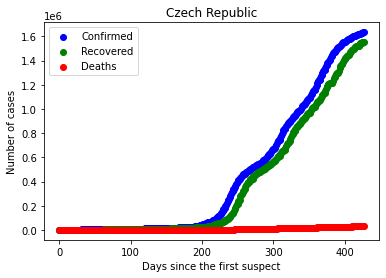

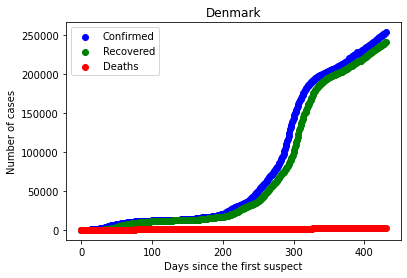

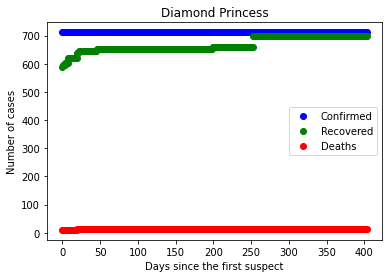

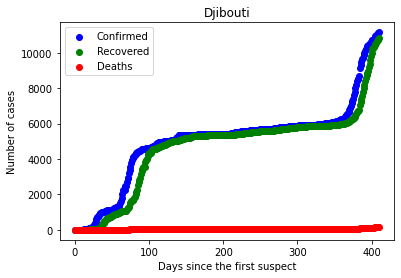

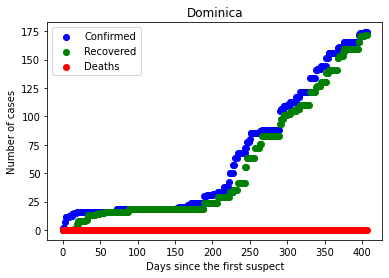

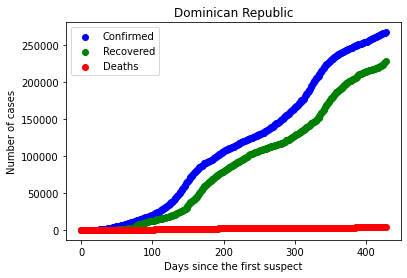

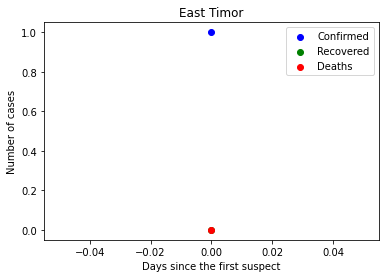

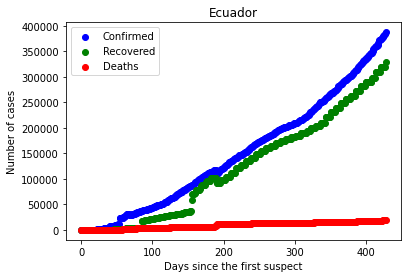

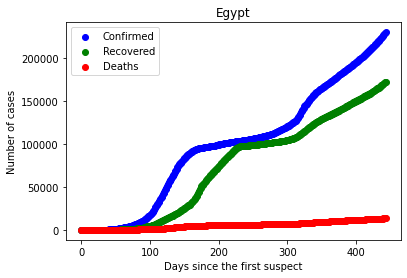

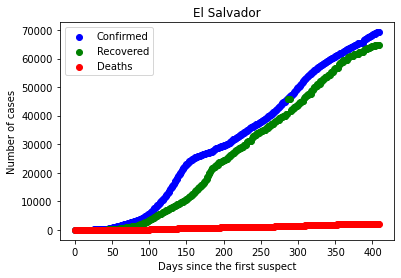

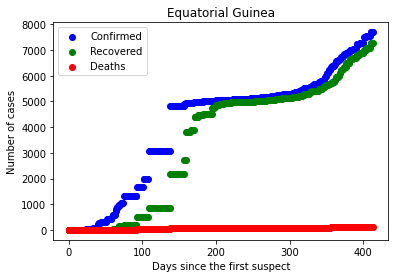

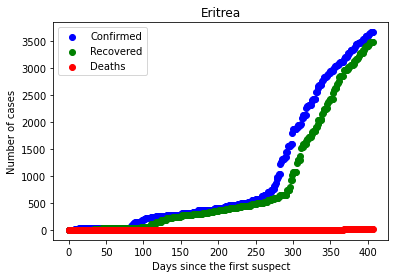

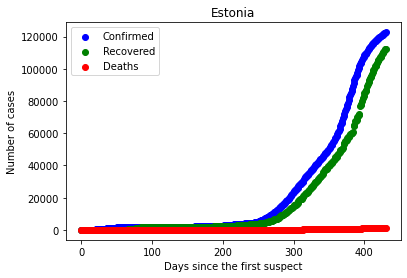

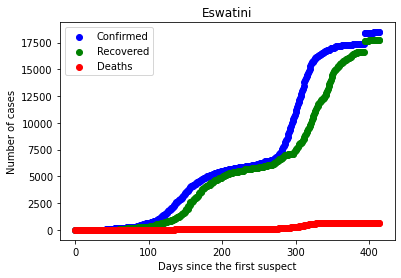

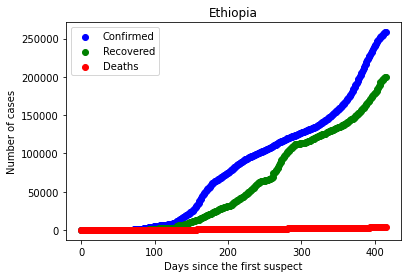

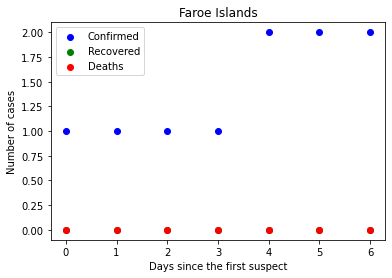

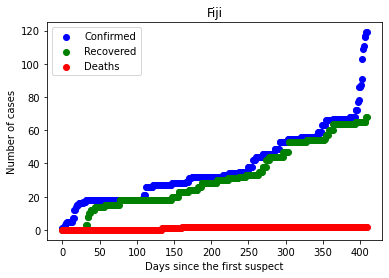

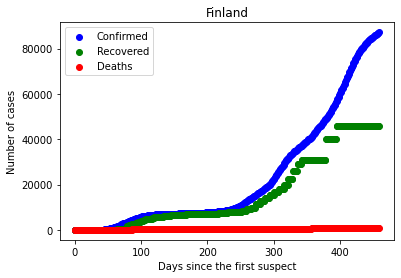

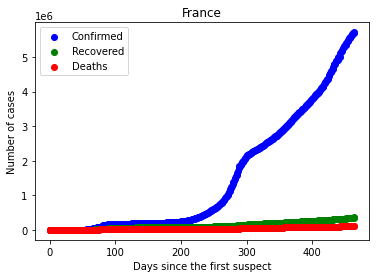

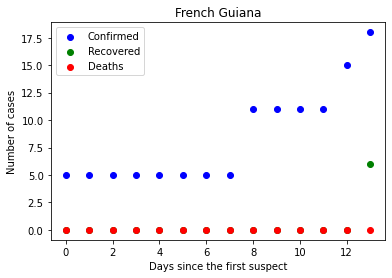

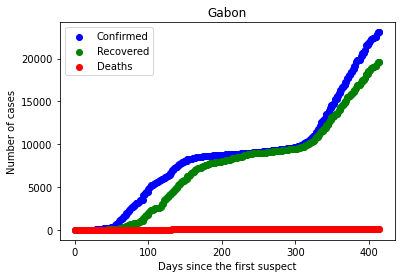

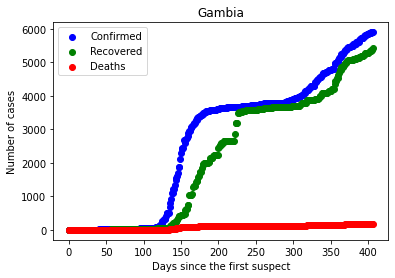

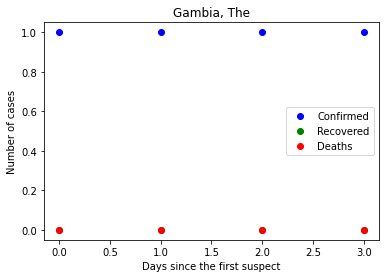

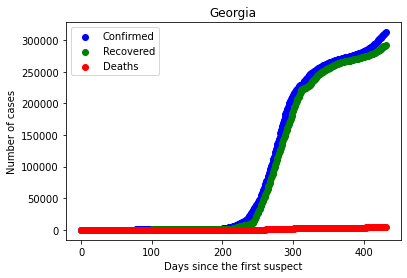

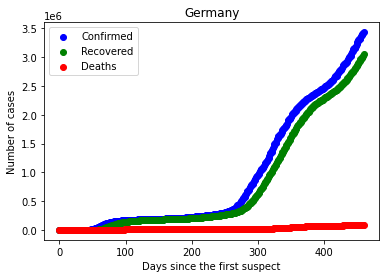

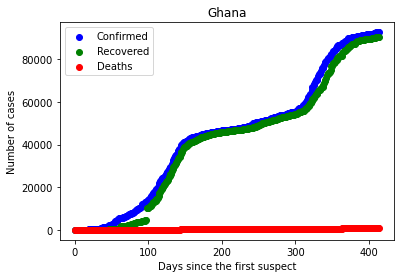

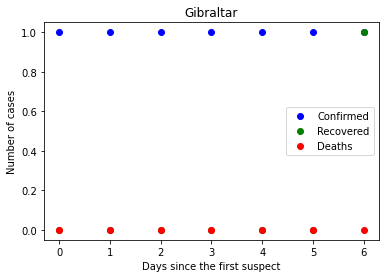

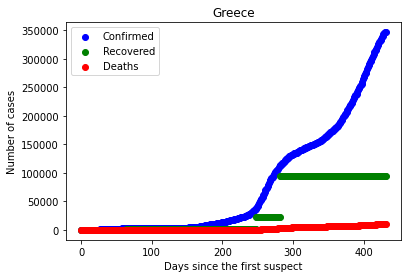

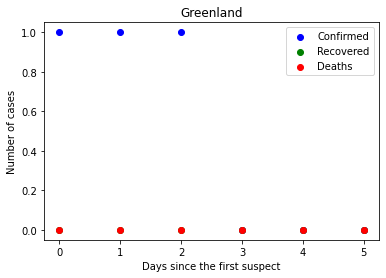

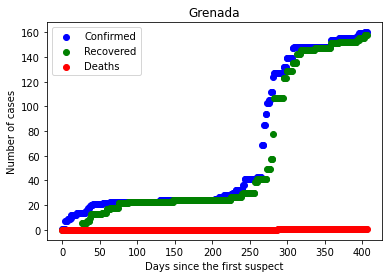

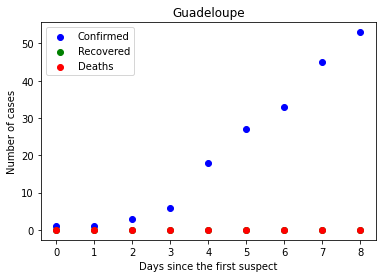

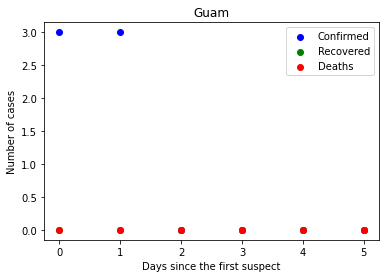

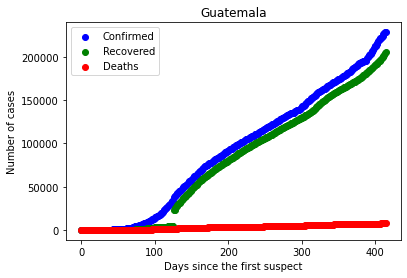

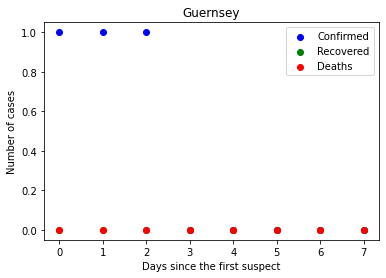

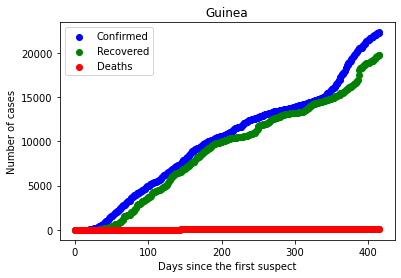

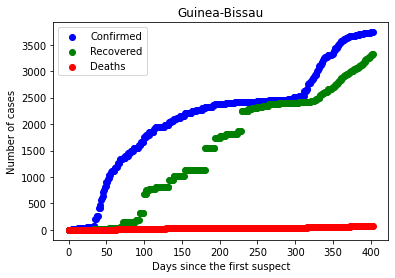

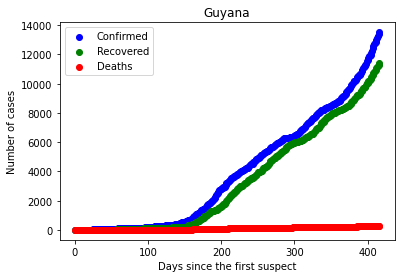

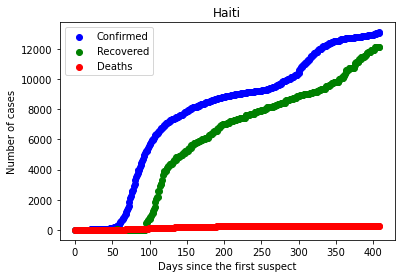

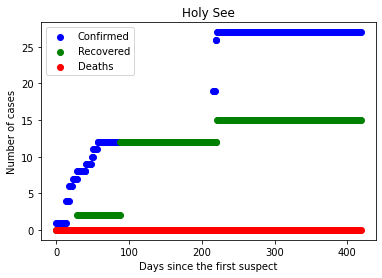

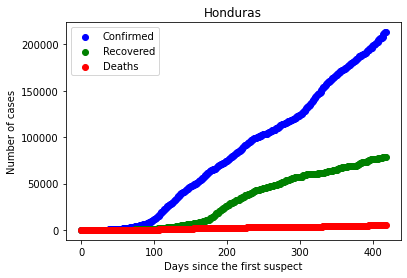

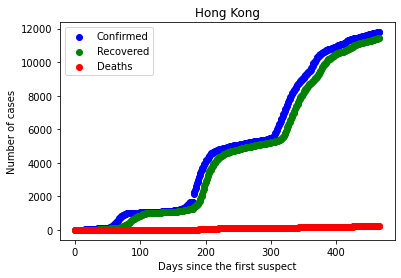

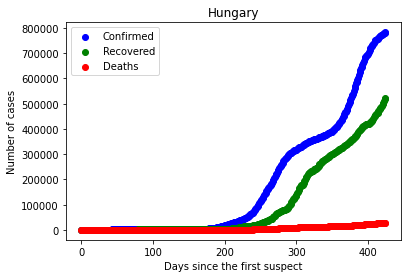

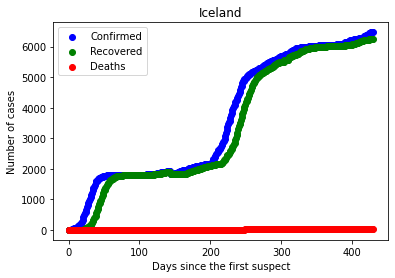

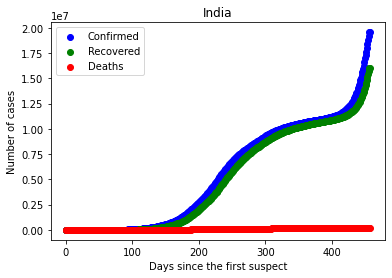

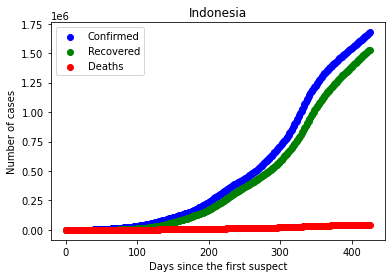

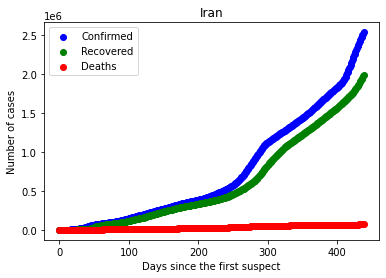

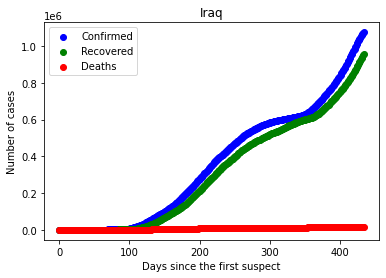

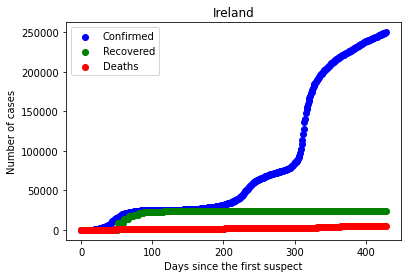

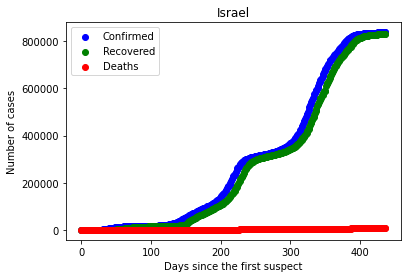

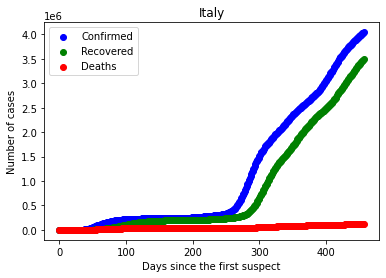

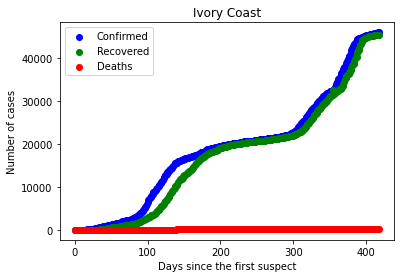

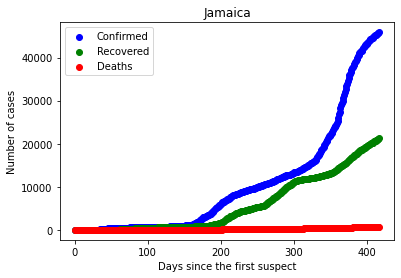

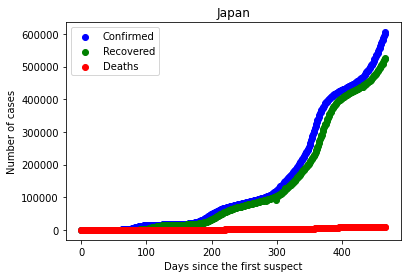

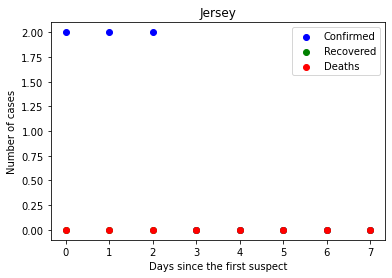

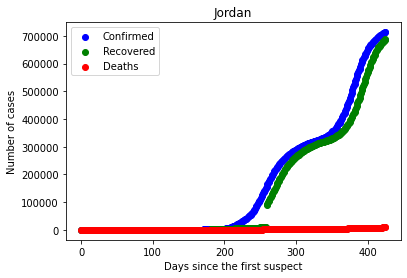

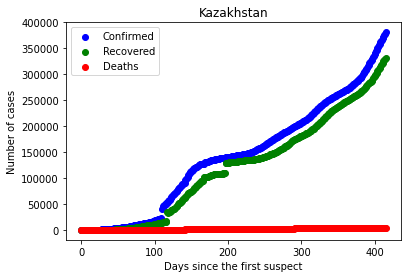

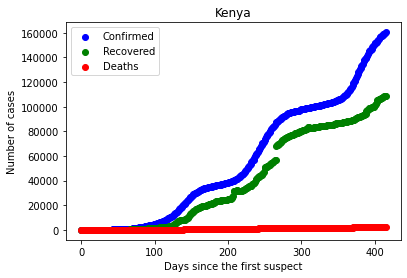

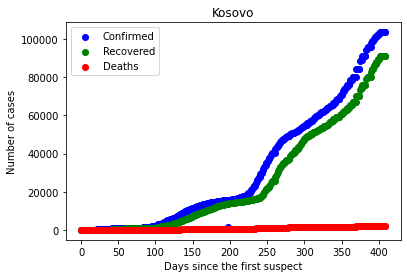

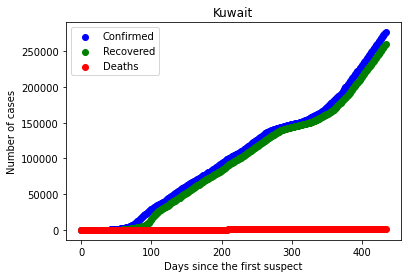

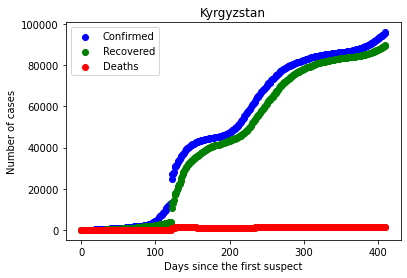

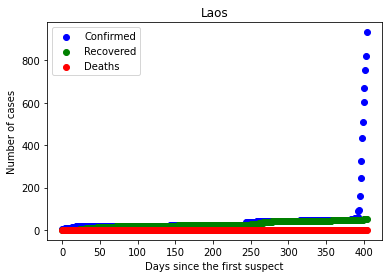

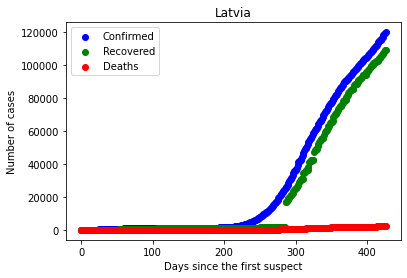

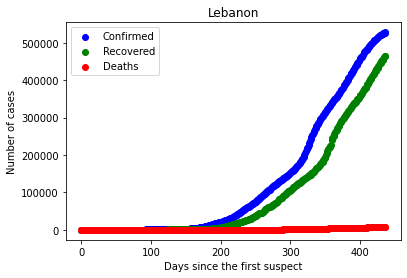

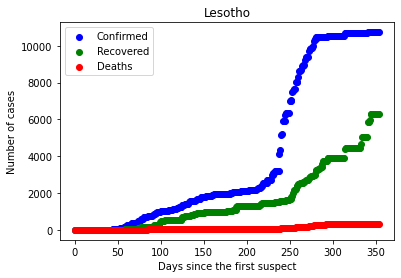

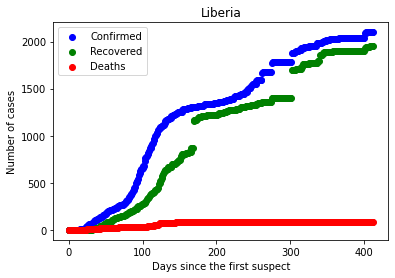

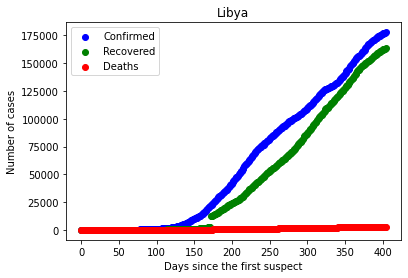

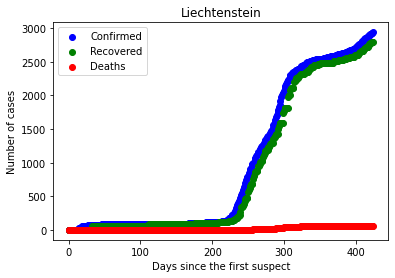

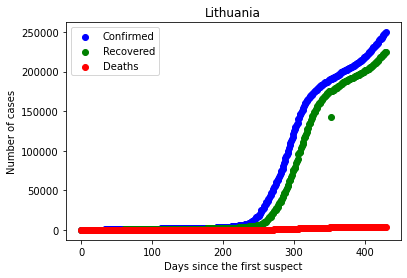

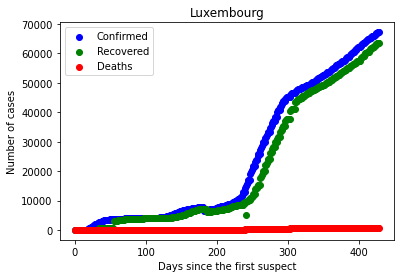

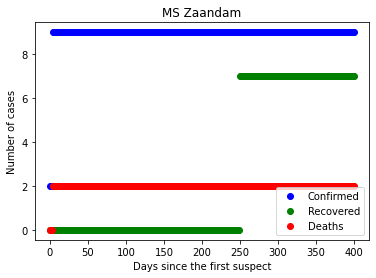

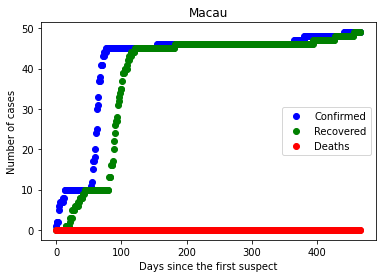

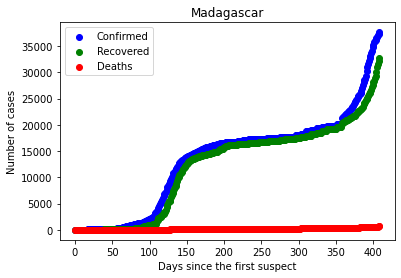

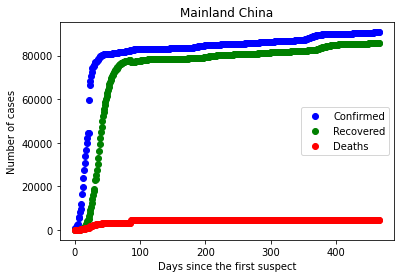

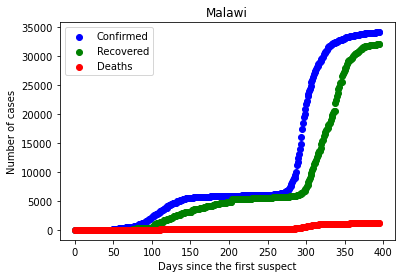

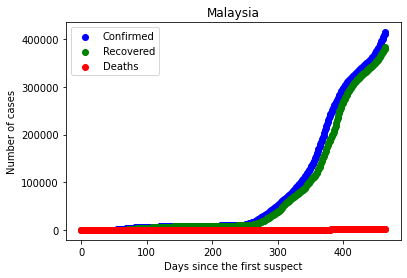

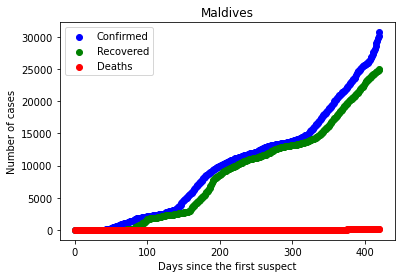

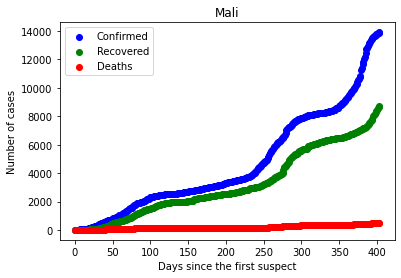

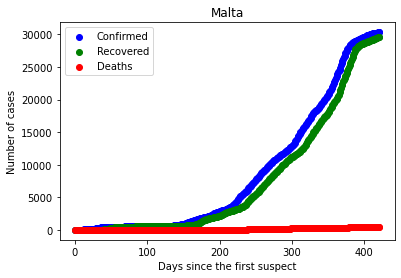

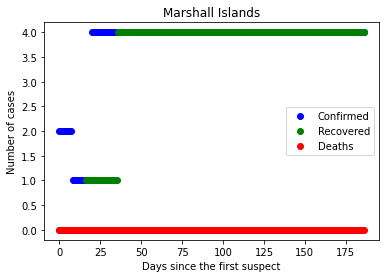

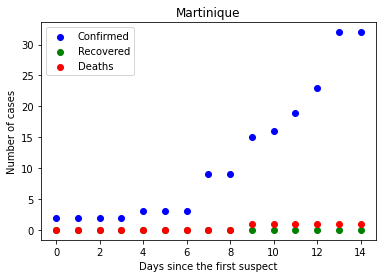

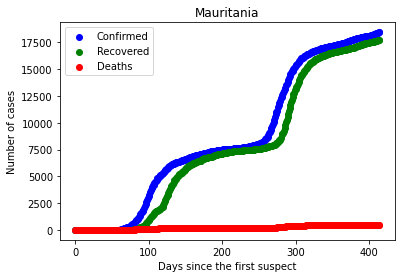

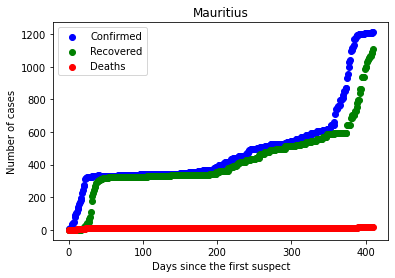

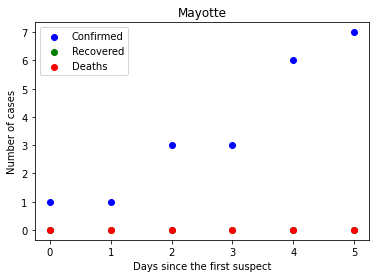

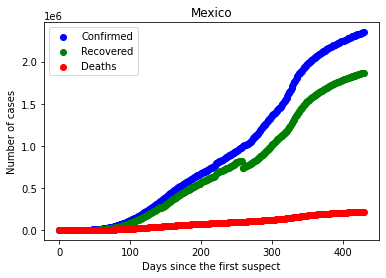

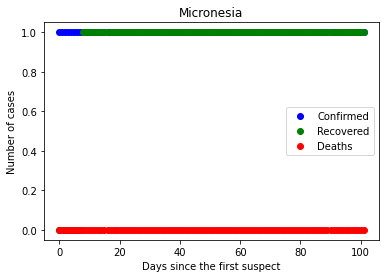

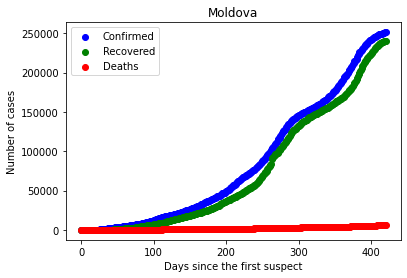

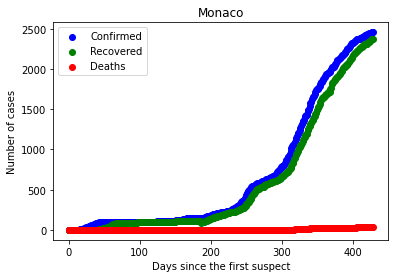

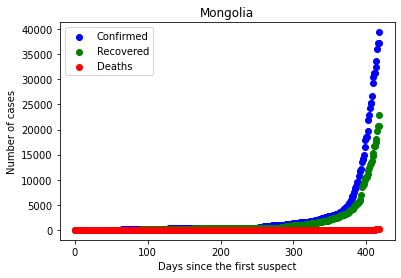

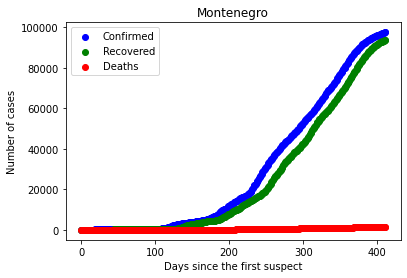

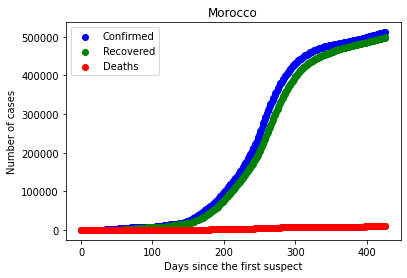

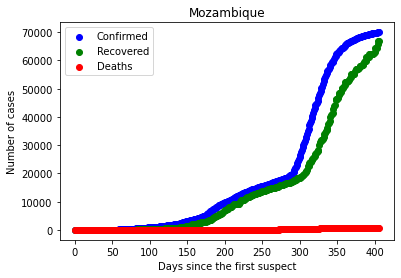

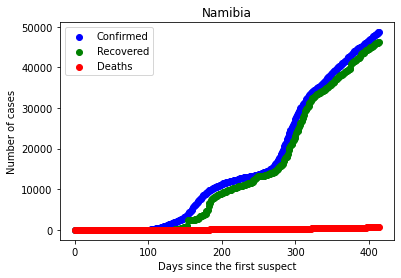

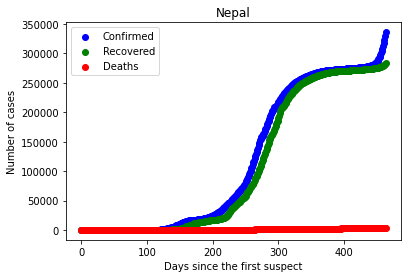

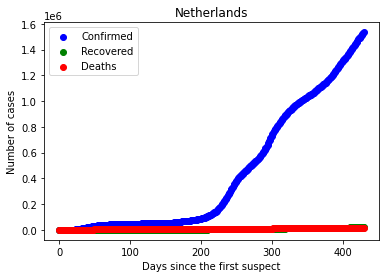

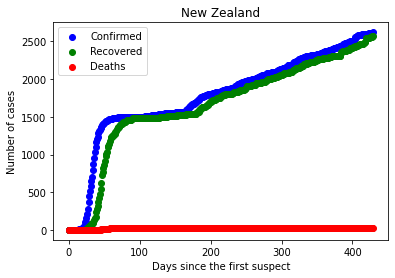

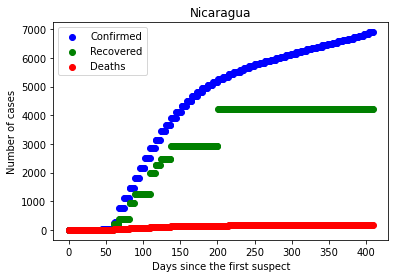

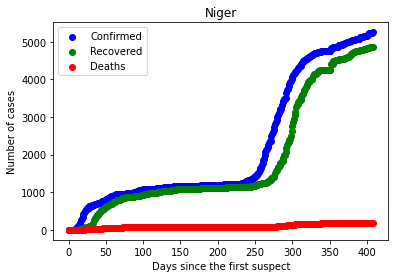

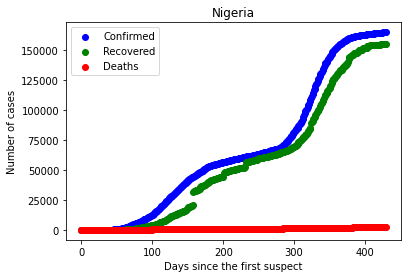

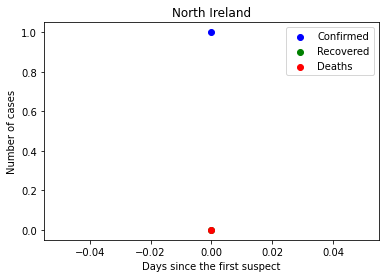

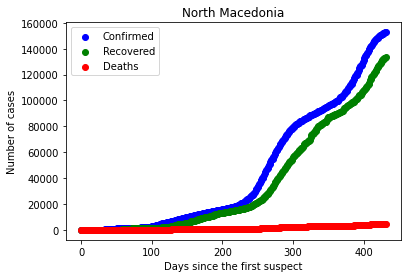

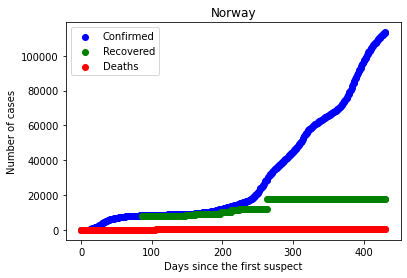

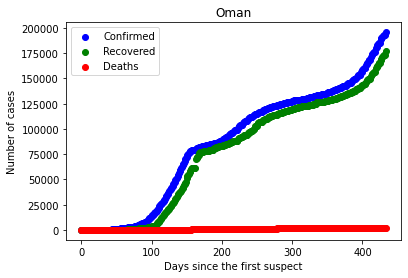

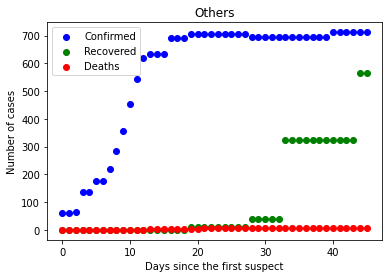

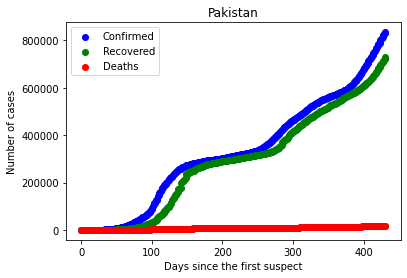

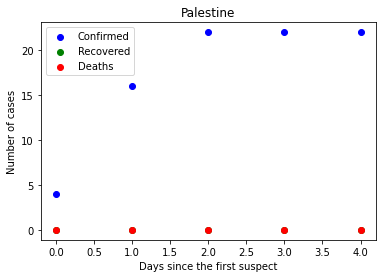

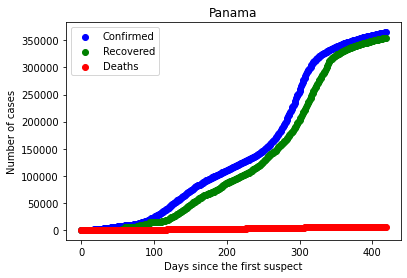

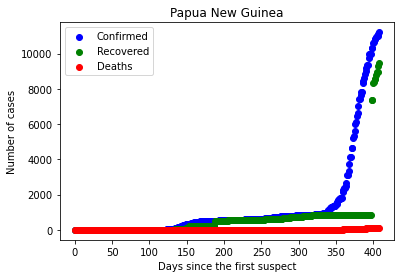

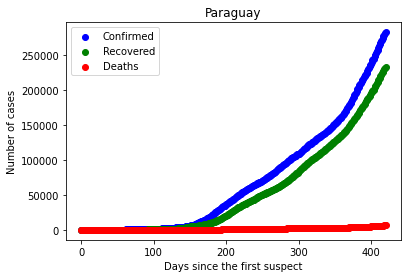

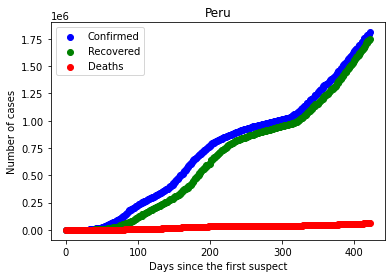

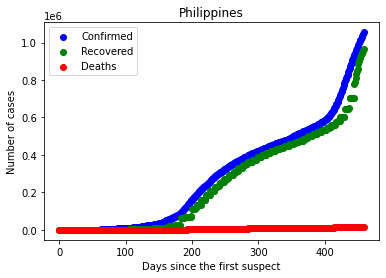

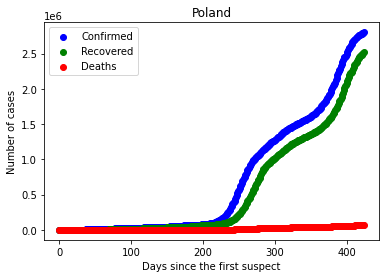

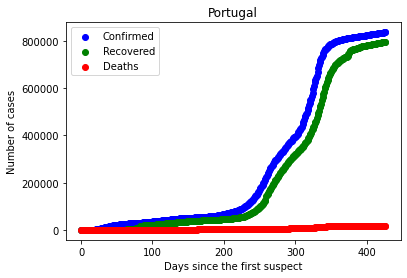

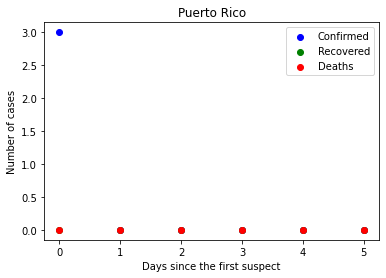

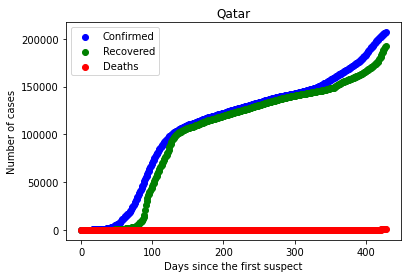

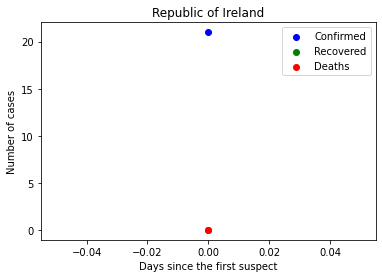

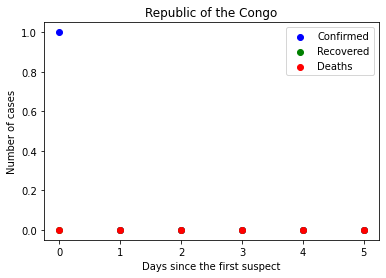

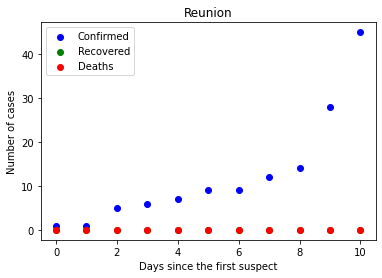

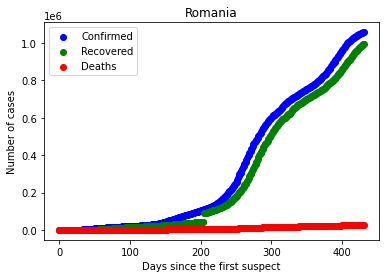

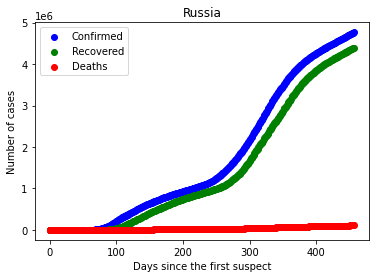

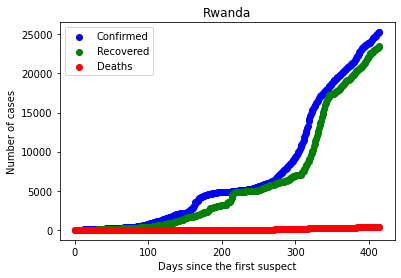

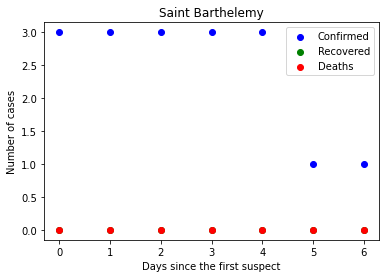

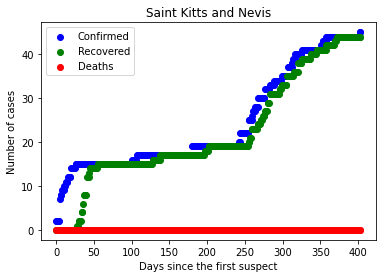

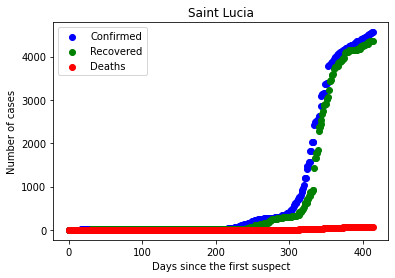

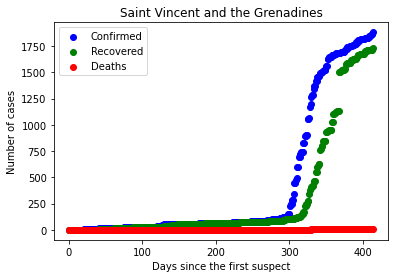

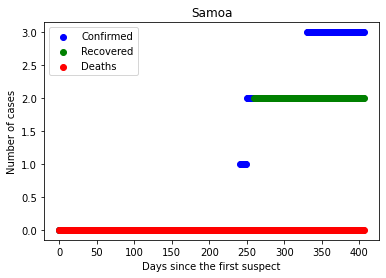

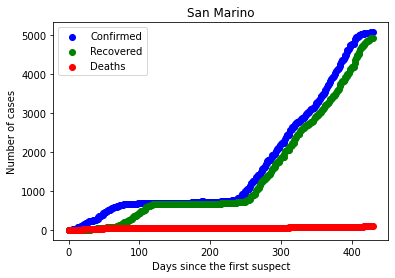

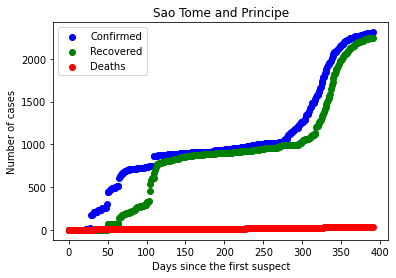

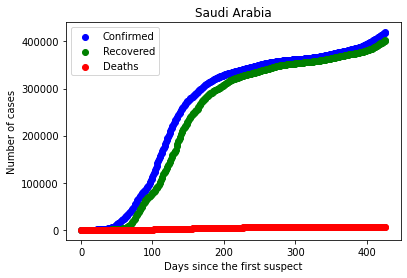

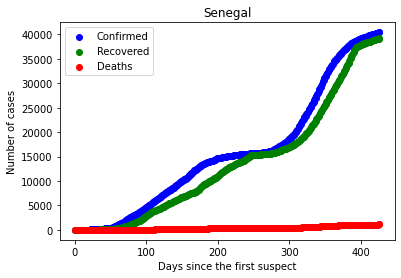

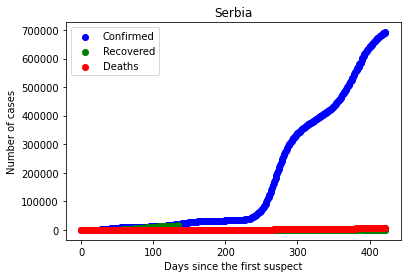

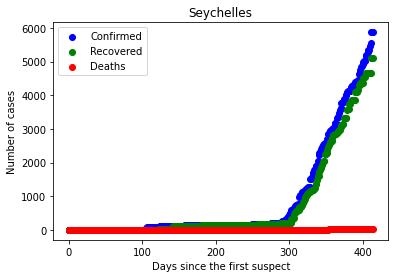

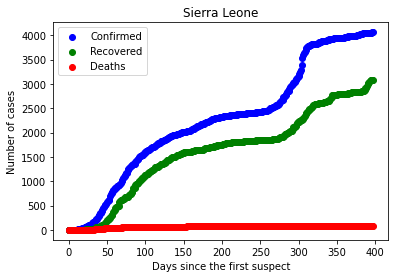

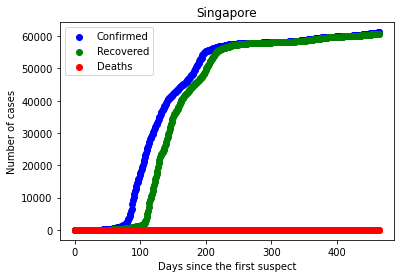

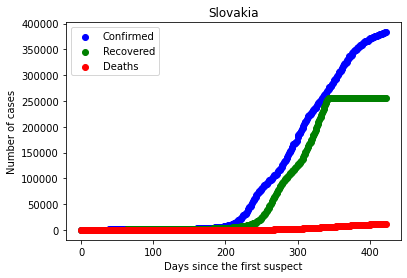

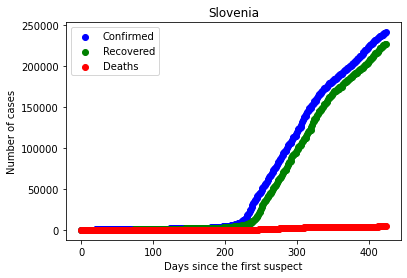

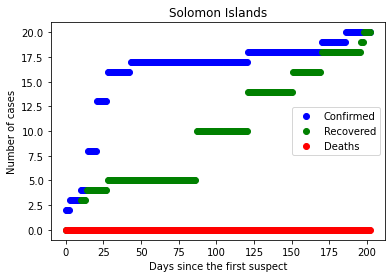

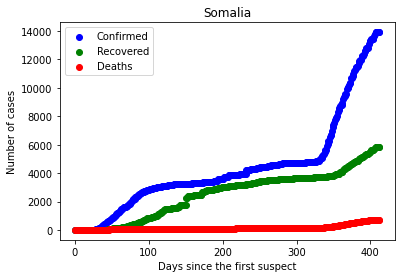

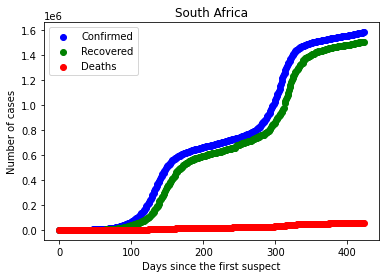

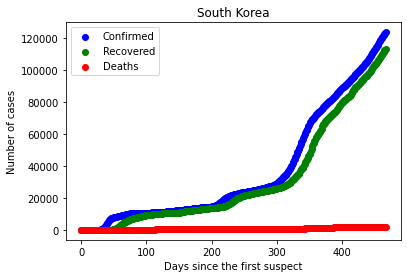

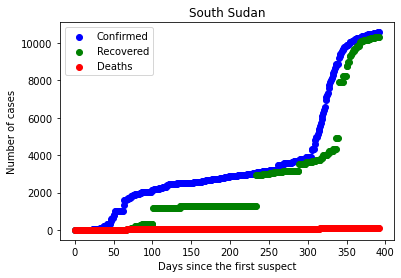

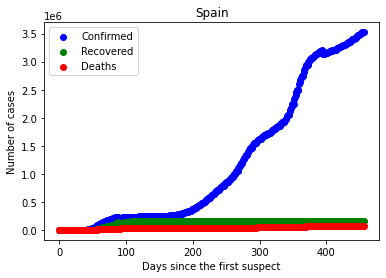

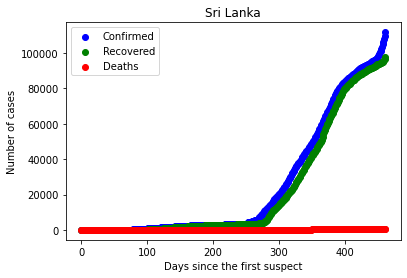

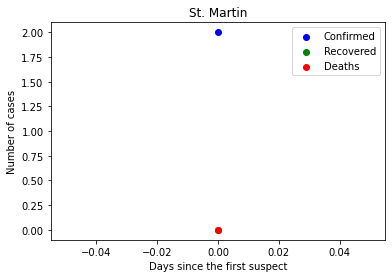

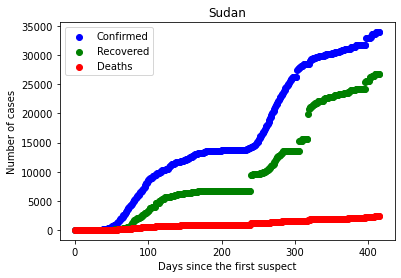

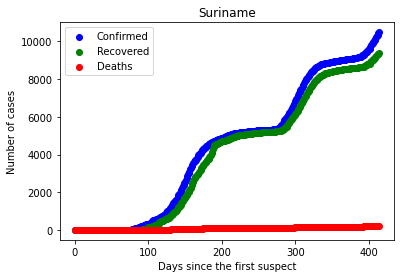

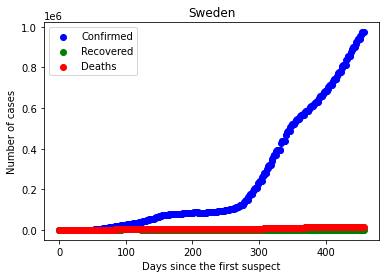

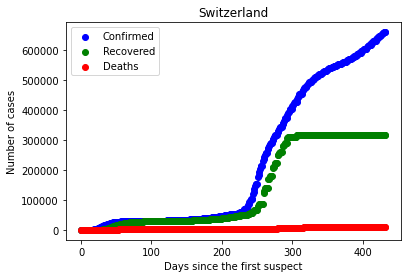

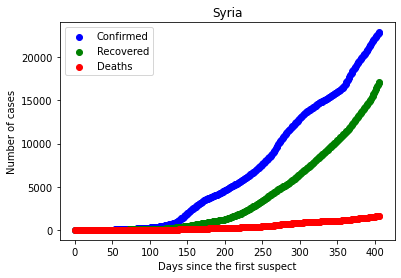

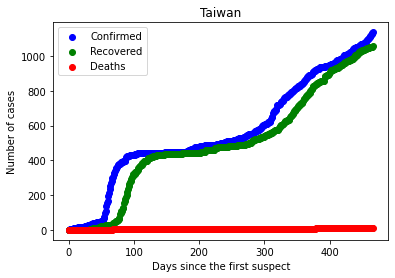

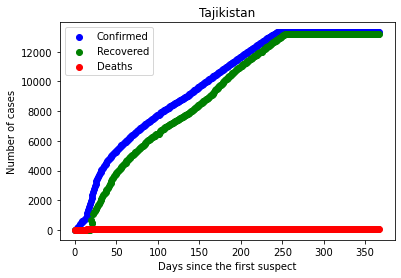

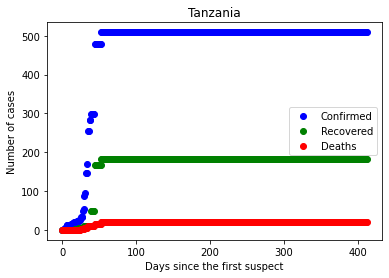

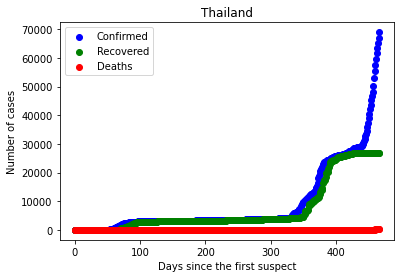

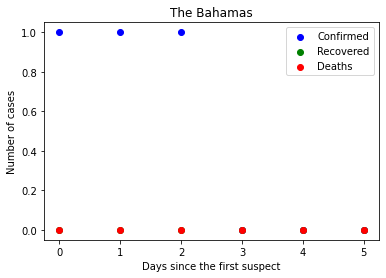

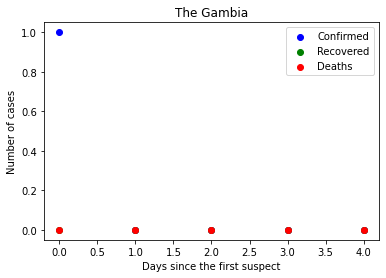

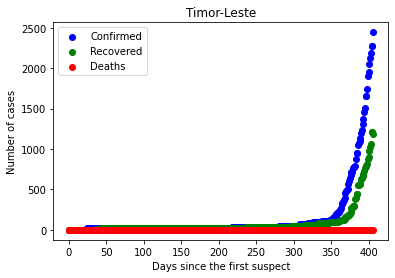

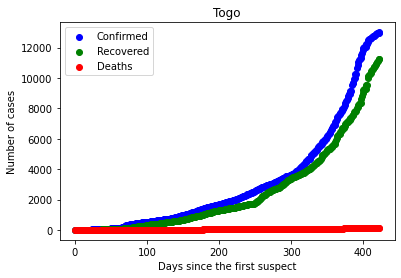

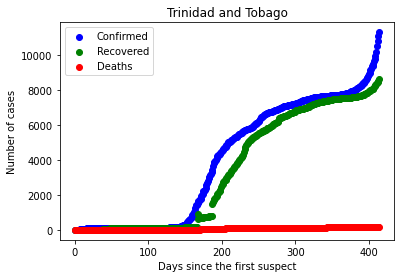

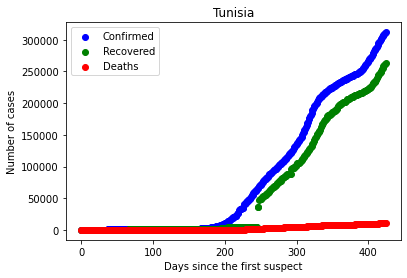

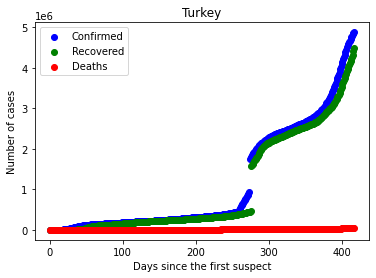

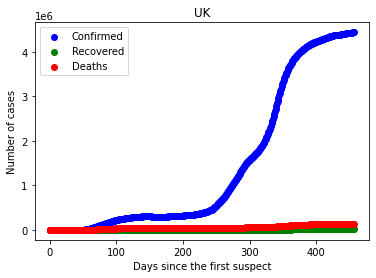

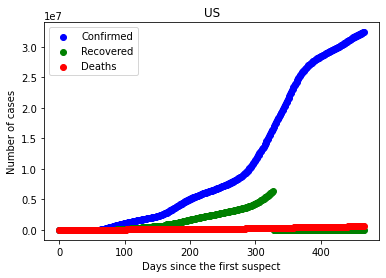

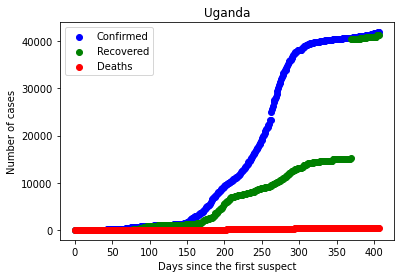

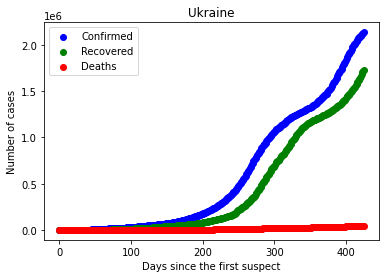

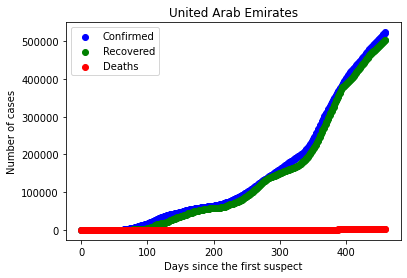

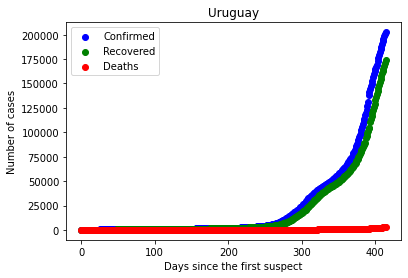

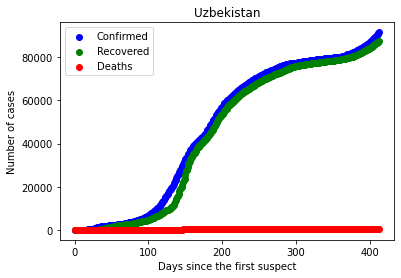

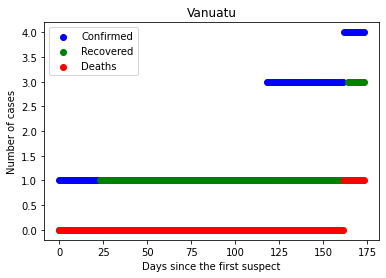

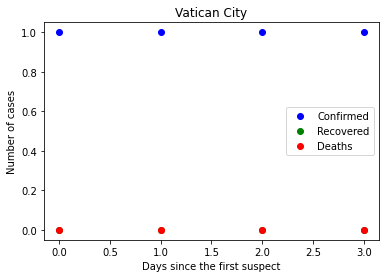

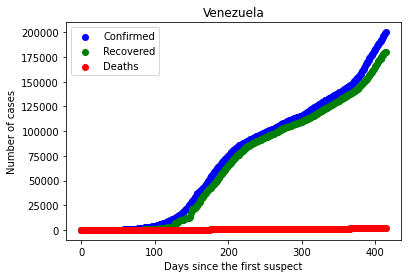

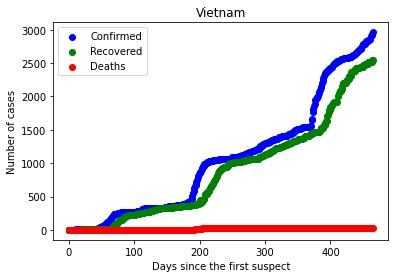

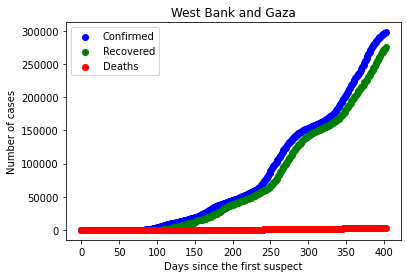

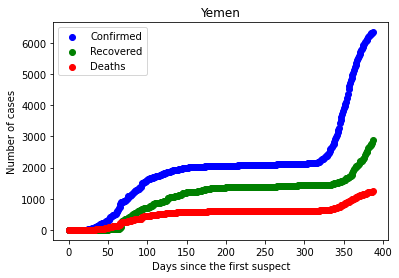

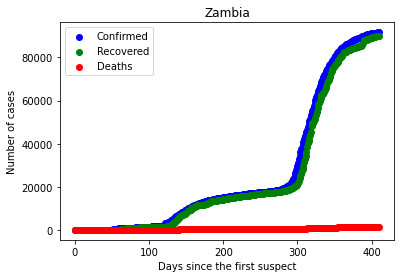

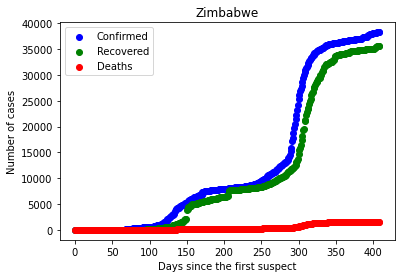

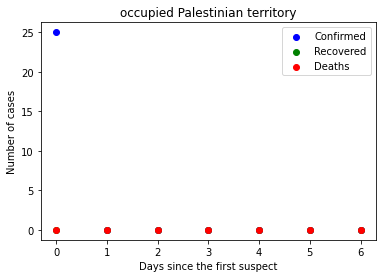

In [16]:
for i in range(0, len(countries)):
    c = df2[df2['Country']==countries[i]].reset_index()
    plt.scatter(np.arange(0, len(c)), c['Confirmed'], color='blue', label='Confirmed')
    plt.scatter(np.arange(0, len(c)), c['Recovered'], color='green', label='Recovered')
    plt.scatter(np.arange(0, len(c)), c['Deaths'], color='red', label='Deaths')
    plt.title(countries[i])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()

In [19]:
df3 = df2.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()

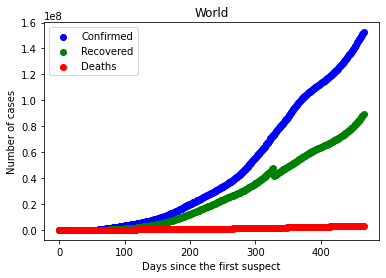

In [20]:
w = df3
plt.scatter(np.arange(0, len(w)), w['Confirmed'], color='blue', label='Confirmed')
plt.scatter(np.arange(0, len(w)), w['Recovered'], color='green', label ='Recovered')
plt.scatter(np.arange(0, len(w)), w['Deaths'], color='red', label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()